In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as mt
from datetime import datetime
from scipy import stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [4]:

df_DAU = pd.read_excel('/content/Тест.xlsx', sheet_name= 'DAU')

В таблице df_first_list представлена информация о датах и количестве уникальных пользователей

In [5]:
df_DAU

,Дата,Количество уникальных пользователей
0,2020-02-15,5196
1,2020-02-16,5256
2,2020-02-17,5160
3,2020-02-18,4886
4,2020-02-19,4077
5,2020-02-20,2867
6,2020-02-21,1769
7,2020-02-22,2282
8,2020-02-23,2995
9,2020-02-24,4996


In [6]:
df_DAU.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 2 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Дата                                 28 non-null     datetime64[ns]
 1   Количество уникальных пользователей  28 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 576.0 bytes


In [7]:
# всего  уникальных пользователей
df_DAU['Количество уникальных пользователей'].sum()

101645

In [8]:
df_DAU.columns  = df_DAU.columns.str.lower().str.replace(' ','_')


In [9]:
df_DAU['дата'] = df_DAU['дата'].apply(lambda x: x.strftime('%Y-%m-%d'))


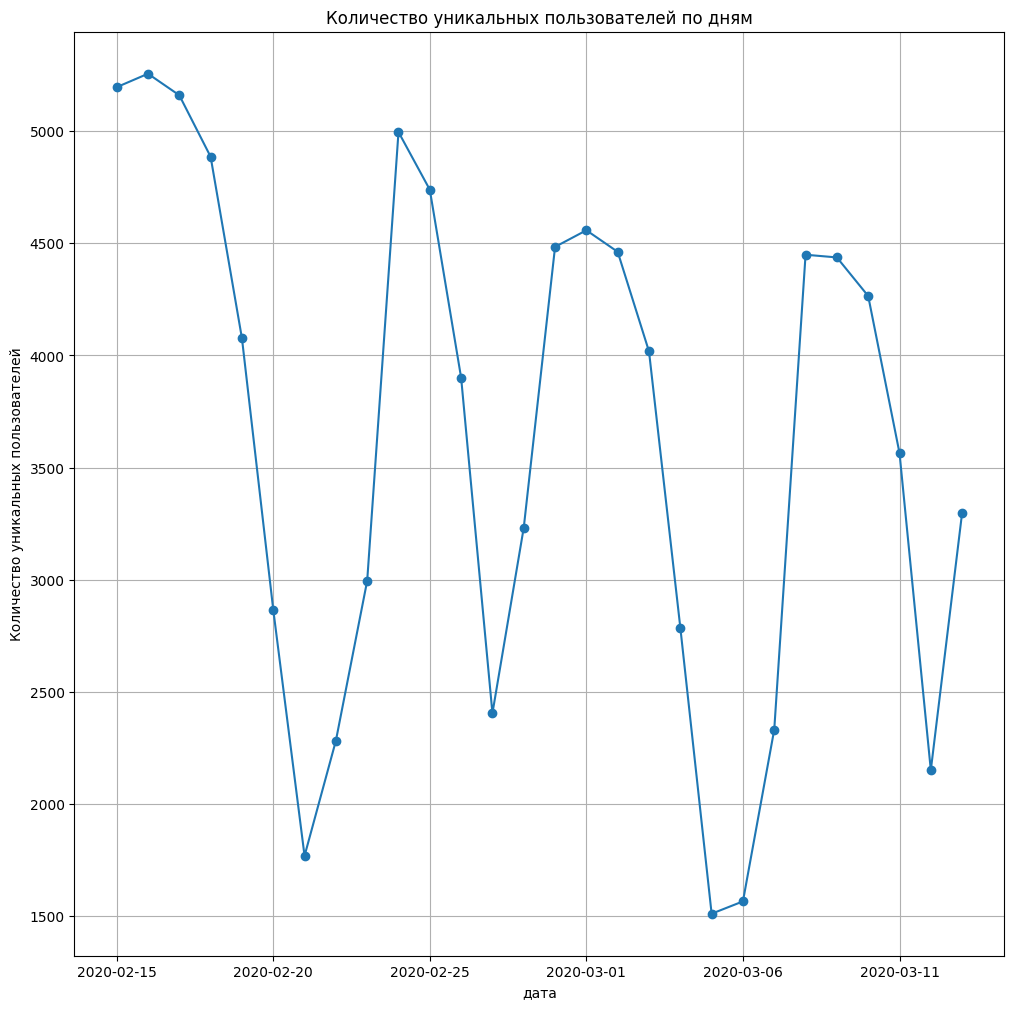

In [10]:
plt.figure(figsize=(12,12))
df_DAU.groupby('дата')['количество_уникальных_пользователей'].sum().plot(grid = True, style='o-')
plt.title('Количество уникальных пользователей по дням')
plt.xlabel('дата')
plt.ylabel('Количество уникальных пользователей')
plt.show()

Исходя из графика можно заметить ярко выраженные точки, где есть спад и есть пик. Таким образом, спад был 21 февраля, 27 февраля, 5 марта и 12 марта. Предположим, что это связано с праздничными днями - 23 февраля и 8 марта, пользователи платформы готовились к праздникам и не обладали свободным временем для образования. Спад был заметен как перед праздниками, так и после праздников.

In [ ]:
df_MAU_MAS = pd.read_excel('/content/Тест.xlsx', sheet_name= 'MAU_MAS')
df_MAU_MAS

In [12]:
df_MAU_MAS.columns = df_MAU_MAS.columns.str.lower().str.replace(' ','_')
df_MAU_MAS

,месяц_года,количество_уникальных_пользователей,количество_уник_школ
0,янв. 2020 г.,37264,2325
1,февр. 2020 г.,29407,2033
2,март 2020 г.,27376,1808
3,апр. 2020 г.,21129,1550


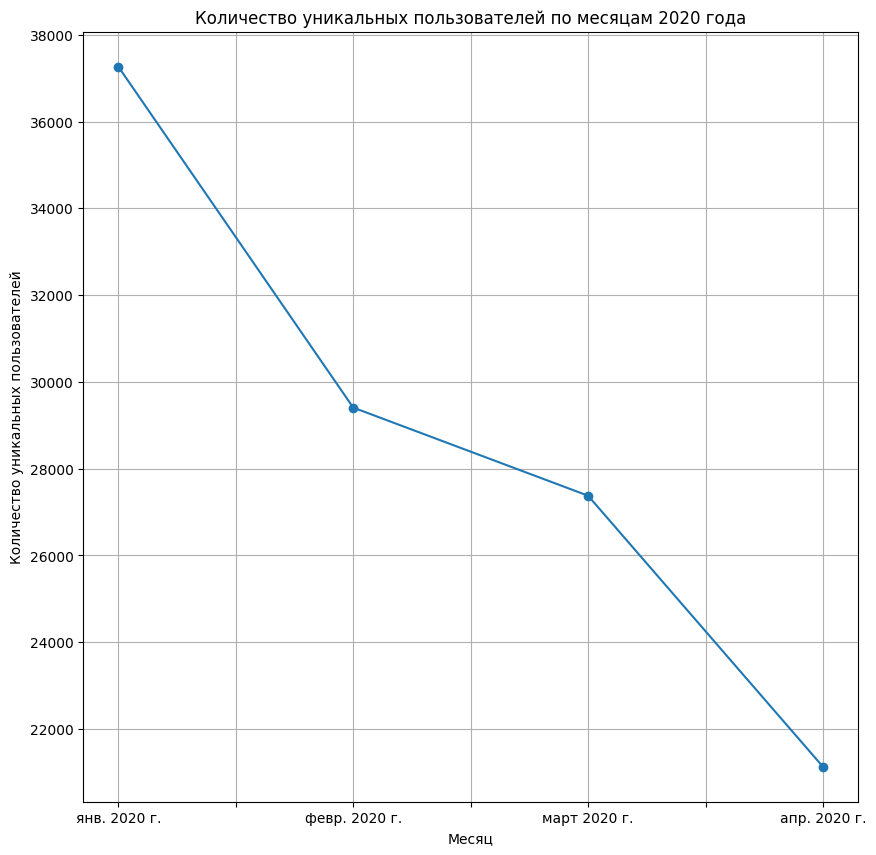

In [13]:
plt.figure(figsize=(10,10))
df_MAU_MAS.groupby('месяц_года')['количество_уникальных_пользователей'].sum().sort_values(ascending=False).plot(grid=True, style='o-')
plt.title('Количество уникальных пользователей по месяцам 2020 года')
plt.xlabel('Месяц')
plt.ylabel('Количество уникальных пользователей')
plt.show()

Количество пользователей по месяцам имело тенденцию к снижению. Максимальное количество пользователей было в январе 2020 года(37264), что можно связать с длинными новогодними праздниками. В 2020 году в январе отдыхали с 1 по 8 января, поэтому можно предположить, что пользователи имели много свободного времени для саморазвития и образования. В феврале отмечался 'День защитника отечества' и пользователи также могли в выходные дни уделить время самообразованию. В марте отмечался Международный женский день. В апреле праздников официальных не было, поэтому и уникальных пользователей не так много по сравнению с предыдущими месяцами.

In [ ]:
df_MAU_MAS.dtypes

In [15]:
df_DAU_days = pd.read_excel('/content/Тест.xlsx', sheet_name= 'DAU_ДНИ')


In [16]:
df_DAU_days

,День недели,Количество уникальных пользователей
0,0,7215
1,1,9893
2,2,11095
3,3,11813
4,4,11058
5,5,9220
6,6,6475


Дни недели соответствуют определенному значению. Понедельник - 0, вторник - 1, среда - 2, четверг - 3, пятница - 4, суббота - 5, воскресенье - 6

In [17]:
df_DAU_days.columns = df_DAU_days.columns.str.lower().str.replace(' ','_')

In [18]:
df_DAU_days

,день_недели,количество_уникальных_пользователей
0,0,7215
1,1,9893
2,2,11095
3,3,11813
4,4,11058
5,5,9220
6,6,6475


In [19]:
df_DAU_days['доля_уникальных_пользователей в %'] = round(df_DAU_days['количество_уникальных_пользователей'] / df_DAU_days['количество_уникальных_пользователей'].sum() * 100,2)
df_DAU_days

,день_недели,количество_уникальных_пользователей,доля_уникальных_пользователей в %
0,0,7215,10.81
1,1,9893,14.82
2,2,11095,16.62
3,3,11813,17.69
4,4,11058,16.56
5,5,9220,13.81
6,6,6475,9.70


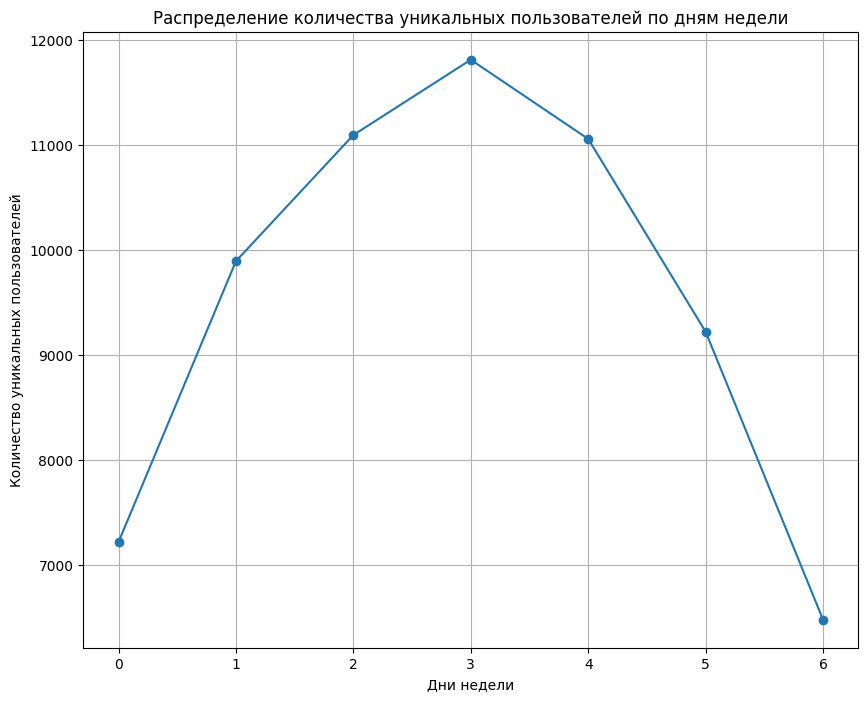

In [20]:
plt.figure(figsize=(10,8))
df_DAU_days.groupby('день_недели')['количество_уникальных_пользователей'].sum().plot(grid = True, style = '-o')
plt.title('Распределение количества уникальных пользователей по дням недели')
plt.xlabel('Дни недели')
plt.ylabel('Количество уникальных пользователей')
plt.show()

Как видно из графика количество уникальных пользователей образовательной платформы увеличивается до четверга, затем количество посещений сокращается и достигает минимума в воскресенье. Можно предположить, что пользователи в выходные дни больше времени отдыхают и их образовательная активность понижается

<Figure size 800x900 with 0 Axes>

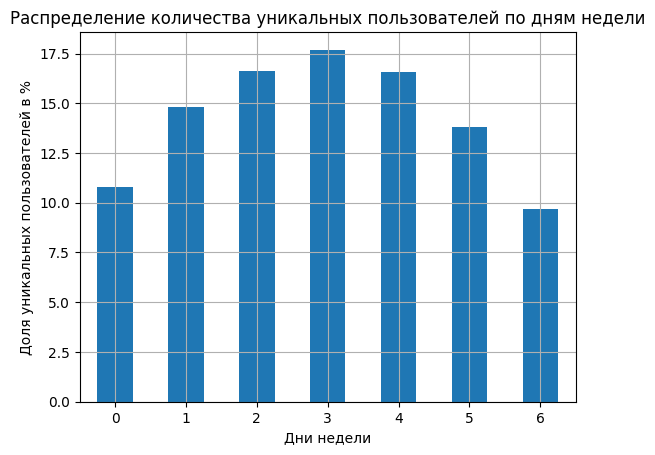

In [21]:
# построим столбчатую диаграмму
plt.figure(figsize=(8,9))
df_DAU_days.plot(kind = 'bar', x = 'день_недели', y = 'доля_уникальных_пользователей в %', legend = False, grid = True)
plt.title('Распределение количества уникальных пользователей по дням недели')
plt.xlabel('Дни недели')
plt.xticks(rotation = 'horizontal')
plt.ylabel('Доля уникальных пользователей в %')
plt.show()

Наибольшая доля посещений образовательной платформы можно наблюдать в четверг (17.69 %), наименьшая доля посещений образовательной платформы была зафиксирована в воскресенье(9.70 %)

In [22]:
df_DAU_hours = pd.read_excel('/content/Тест.xlsx', sheet_name= 'DAU_ЧАСЫ')

In [23]:
df_DAU_hours.columns = df_DAU_hours.columns.str.lower().str.replace(' ','_')

In [24]:
# приведем значения в столбце 'Час' в более удобный формат
df_DAU_hours['час'] = df_DAU_hours['час'].apply(lambda x: x+1)


In [25]:
df_DAU_hours['доля_пользователей в %'] = round(df_DAU_hours['количество_уникальных_пользователей'] / df_DAU_hours['количество_уникальных_пользователей'].sum() * 100,2)
df_DAU_hours.sort_values(by='доля_пользователей в %', ascending = False)

,час,количество_уникальных_пользователей,доля_пользователей в %
11,12,7970,6.71
10,11,7848,6.61
18,19,7742,6.52
12,13,7724,6.51
19,20,7658,6.45
17,18,7618,6.42
14,15,7561,6.37
13,14,7551,6.36
16,17,7533,6.34
15,16,7401,6.23


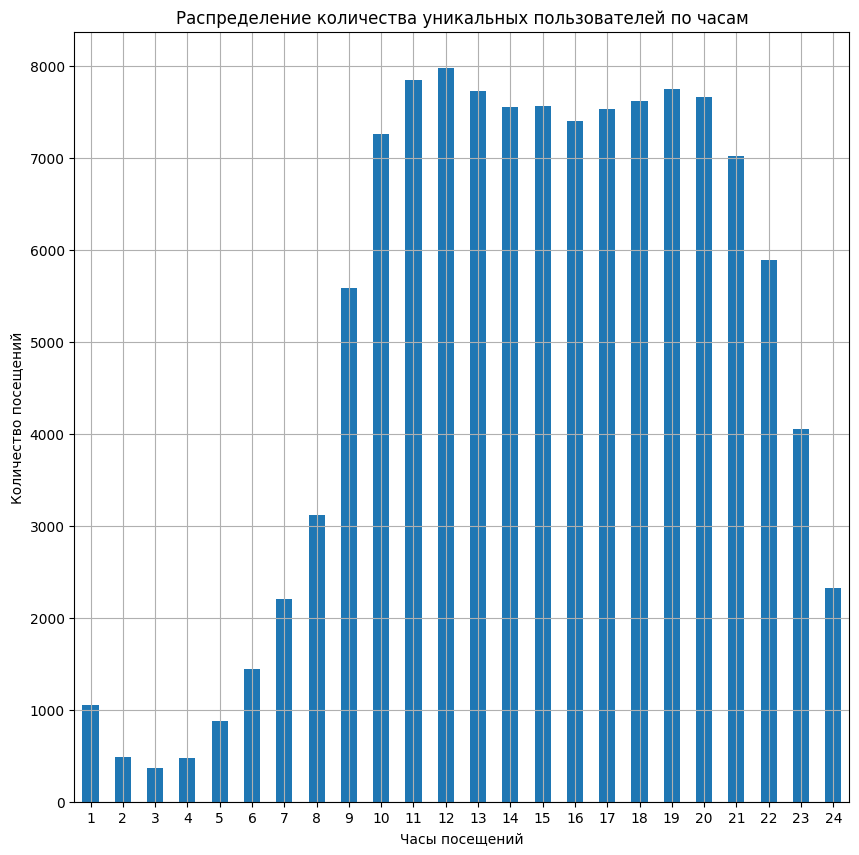

In [26]:
plt.figure(figsize=(10,10))
df_DAU_hours.groupby('час')['количество_уникальных_пользователей'].sum().plot(grid=True, kind = 'bar')
plt.title('Распределение количества уникальных пользователей по часам')
plt.xlabel('Часы посещений')
plt.xticks(rotation='horizontal')
plt.ylabel('Количество посещений')
plt.show()

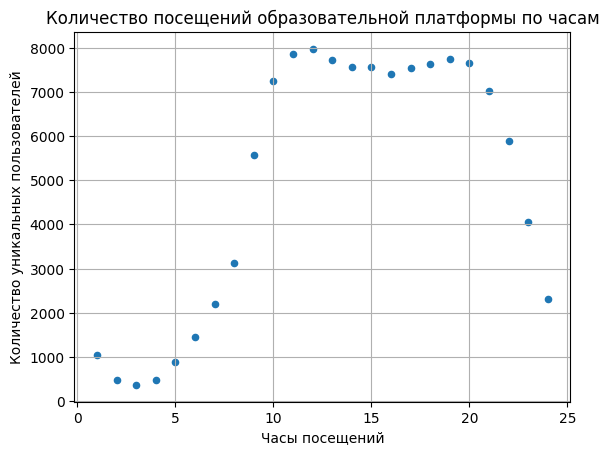

In [27]:
# построим точечную диаграмму
df_DAU_hours.plot(kind='scatter',x = 'час', y = 'количество_уникальных_пользователей',grid = True)
plt.title('Количество посещений образовательной платформы по часам')
plt.xlabel('Часы посещений')
plt.ylabel('Количество уникальных пользователей')
plt.show()


По данным графика можно сделать следующие выводы:
* в ночные часы (от 0 до 6 часов)  наблюдается самое наименьшее количество посещений, большая часть пользователей спит ночью и восстанавливает силы после рабочего дня
* в утренние часы (от 6 до 12 часов) наблюдается рост количества уникальных пользователей ; можно предположить, что у некоторой части пользователей после завтрака появляется свободное время для образовательной активности, особенно для людей, которые работают не с 9 утра, а с 11 часов
* стабильное число уникальных пользователей держится в дневные часы (от 12 до 18 часов) и немного в вечерние часы (с 18 до 20 часов) ; в это время у большинства пользователей происходит пик интеллектуальной активности
* в вечернее время (от 20 до 24 часов)  происходит спад количества уникальных пользователей, можно предположить, что люди выполняют домашние дела, ужинают и готовятся ко сну

In [28]:
df_school_rating = pd.read_excel('/content/Тест.xlsx', sheet_name = 'РЕЙТИНГ_ШКОЛ')

In [29]:
df_school_rating.head()

,Регион (dlv),Сеансы,Количество уникальных пользователей
0,г Москва,43501,878
1,Регион не указан,31377,44
2,Липецкая область,9180,245
3,Московская область,4298,11
4,Липецкая область,3632,156


In [30]:
df_school_rating.tail()

,Регион (dlv),Сеансы,Количество уникальных пользователей
1763,Нижегородская область,1,1
1764,Тамбовская область,1,1
1765,г Москва,1,1
1766,Ямало-Ненецкий АО,1,1
1767,Пензенская область,1,1


In [31]:
# посмотрим на  типы данных
df_school_rating.dtypes

Регион (dlv)                           object
Сеансы                                  int64
Количество уникальных пользователей     int64
dtype: object

In [32]:
# изучим общую информацию о датафрейме
df_school_rating.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1768 entries, 0 to 1767
Data columns (total 3 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Регион (dlv)                         1768 non-null   object
 1   Сеансы                               1768 non-null   int64 
 2   Количество уникальных пользователей  1768 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 41.6+ KB


In [33]:
df_school_rating.columns = df_school_rating.columns.str.lower().str.replace(' ','_')

In [34]:
df_school_rating.sample(1)

,регион_(dlv),сеансы,количество_уникальных_пользователей
1039,Челябинская область,4,2


In [35]:
df_school_rating['сеансы'].sum()

236628

In [36]:
# 10 самых популярных регионов по количеству уникальных пользователей
new_df = df_school_rating.groupby('регион_(dlv)')[['сеансы','количество_уникальных_пользователей']].agg('sum').reset_index()
new_df = new_df.sort_values(by='количество_уникальных_пользователей',ascending=False)[:10]
new_df

,регион_(dlv),сеансы,количество_уникальных_пользователей
28,Липецкая область,27540,1615
18,Калининградская область,8318,1484
19,Калужская область,7190,1266
10,Белгородская область,5539,1176
36,Пензенская область,6845,1158
69,Тамбовская область,4480,1119
79,г Москва,44425,1097
9,Астраханская область,4185,1051
20,Кемеровская область - Кузбасс,5244,1050
70,Томская область,4159,1046


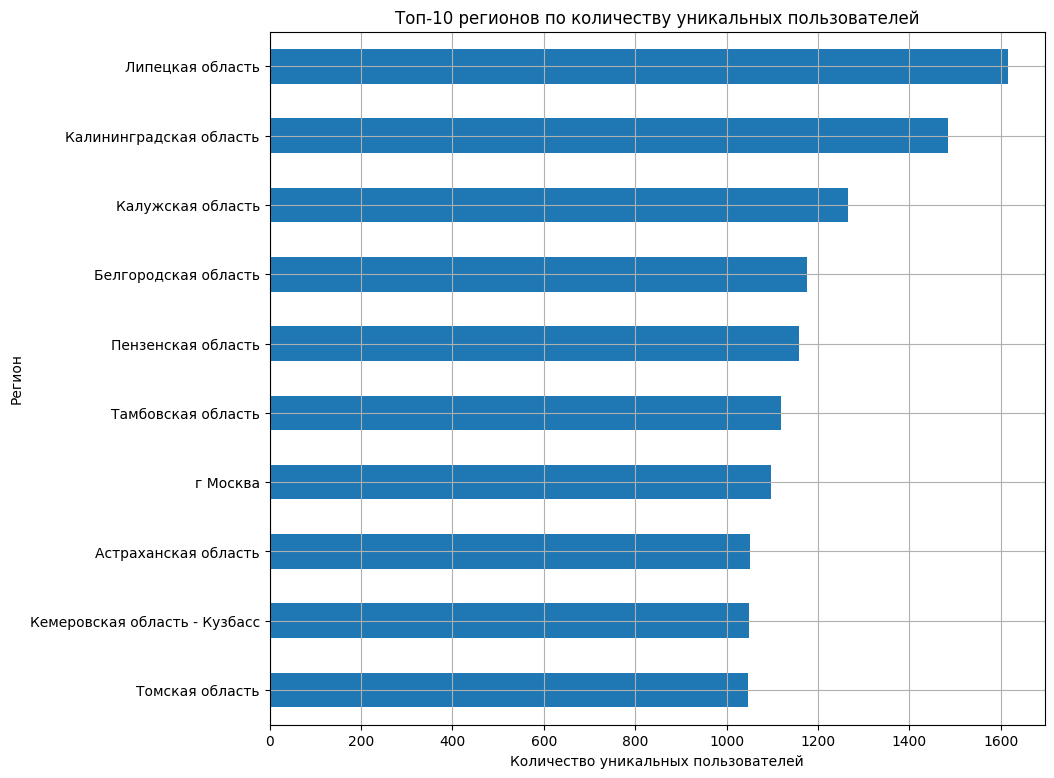

In [37]:
plt.figure(figsize=(10,9))
new_df.groupby('регион_(dlv)')['количество_уникальных_пользователей'].sum().sort_values(ascending=True).plot(kind='barh', grid = True)
plt.title('Топ-10 регионов по количеству уникальных пользователей')
plt.xlabel('Количество уникальных пользователей')
plt.ylabel('Регион')
plt.show()

В топ-3 вошли пользователи из Липецкой, Калининградской и Калужской областей. Москва по количеству уникальных пользователей занимает лишь 7 место

In [38]:
# 10 самых популярных регионов по количеству сеансов
new_df = df_school_rating.groupby('регион_(dlv)')[['сеансы','количество_уникальных_пользователей']].agg('sum').reset_index()
new_df1 = new_df.sort_values(by='сеансы',ascending=False)[:10]
new_df1

,регион_(dlv),сеансы,количество_уникальных_пользователей
79,г Москва,44425,1097
40,Регион не указан,31531,64
28,Липецкая область,27540,1615
80,г Санкт-Петербург,8656,854
18,Калининградская область,8318,1484
19,Калужская область,7190,1266
33,Новосибирская область,6921,532
36,Пензенская область,6845,1158
75,Челябинская область,6831,726
67,Свердловская область,6748,740


In [39]:
region_count = new_df1['сеансы'].sum()

<Figure size 1000x1000 with 0 Axes>

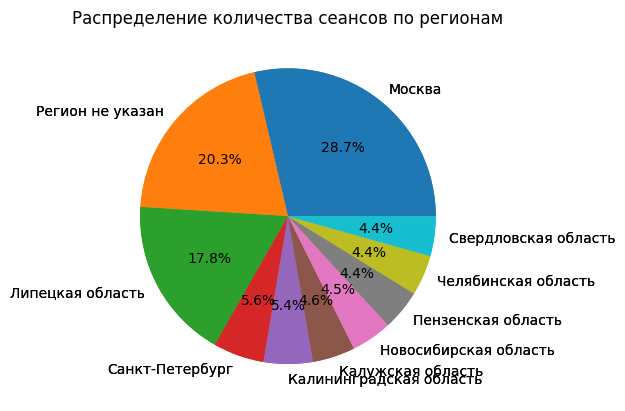

In [40]:

plt.figure(figsize=(10,10))

labels = 'Москва','Регион не указан','Липецкая область','Санкт-Петербург','Калининградская область','Калужская область','Новосибирская область','Пензенская область','Челябинская область','Свердловская область'
sizes = [44425,31531,27540,8656,8318,7190,6921,6845,6831,6748]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)

ax.pie(sizes, labels = labels, autopct='%1.1f%%')

ax.set_title('Распределение количества сеансов по регионам')

plt.show()

Видим, что наибольшая доля посещений приходилась на Москву(28.7 %), на втором месте пользователи, которые совершали сеанс и не указывали регион.(20.3 %).На третьем месте по доле посещений пользователи из Липецкой области (17.8 %)

In [41]:
DAU_users_school = pd.read_excel('/content/Тест.xlsx', sheet_name= 'DAU_ПОЛЬЗ+ШКОЛА')

In [42]:
DAU_users_school

,Дата,Количество уникальных пользователей,Количество уникальных школ
0,2020-02-15,5196,602
1,2020-02-16,5256,595
2,2020-02-17,5160,600
3,2020-02-18,4886,523
4,2020-02-19,4077,528
5,2020-02-20,2867,433
6,2020-02-21,1769,364
7,2020-02-22,2282,416
8,2020-02-23,2995,499
9,2020-02-24,4996,588


In [43]:
DAU_users_school.columns = DAU_users_school.columns.str.lower().str.replace(' ','_')

In [44]:
DAU_users_school.head()

,дата,количество_уникальных_пользователей,количество_уникальных_школ
0,2020-02-15,5196,602
1,2020-02-16,5256,595
2,2020-02-17,5160,600
3,2020-02-18,4886,523
4,2020-02-19,4077,528


In [45]:
DAU_users_school.tail()

,дата,количество_уникальных_пользователей,количество_уникальных_школ
27,2020-03-14,3299,472
28,2020-04-12,4711,620
29,2020-04-13,5302,627
30,2020-04-14,2331,439
31,2020-04-15,1688,351


In [46]:
DAU_users_school['доля_уникальных_пользователей в %'] = round(DAU_users_school['количество_уникальных_пользователей'] /  DAU_users_school['количество_уникальных_пользователей'].sum() * 100,2)
DAU_users_school['доля_уникальных_школ в %'] = round(DAU_users_school['количество_уникальных_школ'] / DAU_users_school['количество_уникальных_школ'].sum() * 100,2)
DAU_users_school

,дата,количество_уникальных_пользователей,количество_уникальных_школ,доля_уникальных_пользователей в %,доля_уникальных_школ в %
0,2020-02-15,5196,602,4.49,3.79
1,2020-02-16,5256,595,4.54,3.75
2,2020-02-17,5160,600,4.46,3.78
3,2020-02-18,4886,523,4.22,3.29
4,2020-02-19,4077,528,3.52,3.33
5,2020-02-20,2867,433,2.48,2.73
6,2020-02-21,1769,364,1.53,2.29
7,2020-02-22,2282,416,1.97,2.62
8,2020-02-23,2995,499,2.59,3.14
9,2020-02-24,4996,588,4.32,3.70


<Axes: xlabel='дата'>

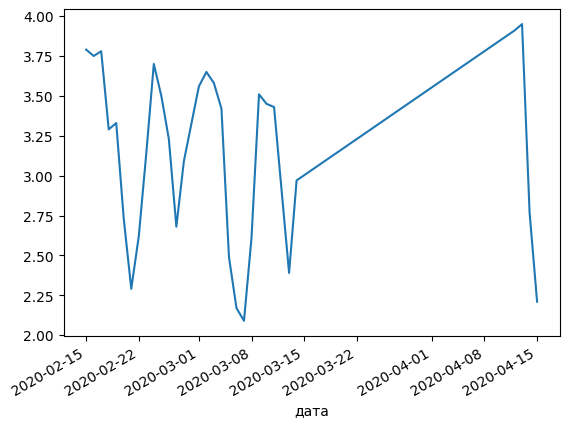

In [47]:
DAU_users_school.groupby('дата')['доля_уникальных_школ в %'].sum().plot()

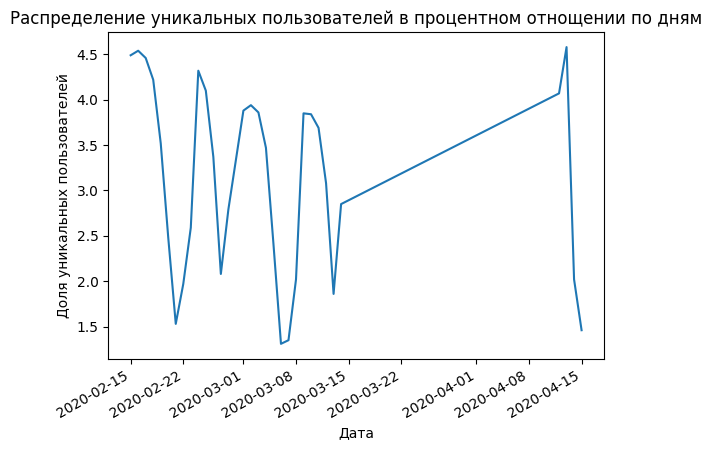

In [48]:
DAU_users_school.groupby('дата')['доля_уникальных_пользователей в %'].sum().plot()
plt.title('Распределение уникальных пользователей в процентном отнощении по дням')
plt.xlabel('Дата')
plt.ylabel('Доля уникальных пользователей')
plt.show()

График имеет определенную цикличность, с 15 марта наблюдается резкое увеличение доли уникальных пользователей. Можно предположить, что с середины марта 2020 года в России наступил локдаун, связанный с распространением пандемии коронавируса и люди были вынуждены оставаться дома и проводить время в домашних условиях. Одним из вариантов времяпрепровождения стало самообразование и посещение образовательных платформ.

Ссылка на презентацию: https://docs.google.com/presentation/d/11G_xGfOvCkeWfAo4Tsrd6_O9j4Wibur3yCJd7vDBO38/edit?usp=sharing